# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [2]:
import io
import os
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [3]:
path_data = "/home/Udacity/Self_Driving_Car/Object_Detection_Project/data/waymo/training_and_validation/*.tfrecord"
dataset = get_dataset(path_data)
dataset

INFO:tensorflow:Reading unweighted datasets: ['/home/Udacity/Self_Driving_Car/Object_Detection_Project/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/Udacity/Self_Driving_Car/Object_Detection_Project/data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 96
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2022-08-06 17:55:31.899867: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-06 17:55:31.911186: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-06 17:55:31.911958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-08-06 17:55:31.914696: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

<PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'source_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'key': TensorSpec(shape=(), dtype=tf.string, name=None), 'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'groundtruth_image_confidences': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'groundtruth_verified_neg_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_not_exhaustive_classes': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_boxes': TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), 'groundtruth_area': TensorSpec(shape=(None,), dtype=tf.float32, name=None), 'groundtruth_is_crowd': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'groundtruth_difficult': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'groundtruth_group_of': TensorSpec(shape=(None,), dtype=tf.bool, name=None), 'groundtruth_weights': TensorSpec(shape=(None,), dtype=tf

In [4]:
batchs=dataset.take(1)
for batch in batchs:
    # Variables
    name    = batch['filename']
    img     = batch['image'].numpy()
    img_shape = img.shape
    bboxes   = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes'].numpy()

    #Display the information of the tfrecord
    print('#########################################TFrecord Information#########################################')
    print('Name of the TFrecord: {}'.format(batch['filename']))
    print('The shape of the image is: {}'.format(img_shape))
    print('The are {} boxes in the image:'.format(len(bboxes)))
    print('The are {} objects in the image:'.format(len(classes)))

#########################################TFrecord Information#########################################
Name of the TFrecord: b'segment-10770759614217273359_1465_000_1485_000_with_camera_labels_50.tfrecord'
The shape of the image is: (640, 640, 3)
The are 28 boxes in the image:
The are 28 objects in the image:


## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

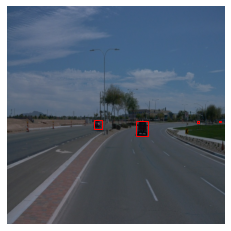

In [5]:
def display_images(batch):
    #plot image
    fig, ax=plt.subplots()
    img=batch["image"].numpy()
    ax.imshow(img)
    
    # mapping = {1: 'vehicle', 2: 'pedestrian', 4: 'cyclist'}
    color_mapping = {1: 'red', 2: 'blue', 4: 'green'}
    
    # plot bounding box with different colors
    for bb, label in zip (batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        #calculating bounding box
        y1, x1, y2, x2 = bb
        x1,x2=x1*img.shape[0], x2*img.shape[0]
        y1,y2=y1*img.shape[1], y2*img.shape[1]
        xy = (x1, y1)
        width = x2 - x1
        height = y2 - y1
        rec = patches.Rectangle(xy, width, height, linewidth=1, edgecolor=color_mapping[label], facecolor='none')
        ax.add_patch(rec)
    plt.axis('off')
    

for batch1 in dataset.take(1):
    display_images(batch1)


## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 1440x1440 with 0 Axes>

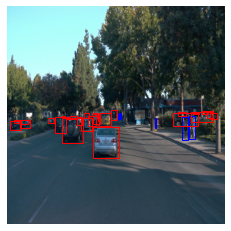

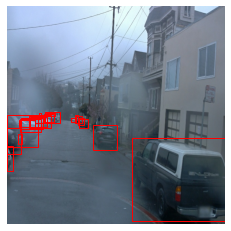

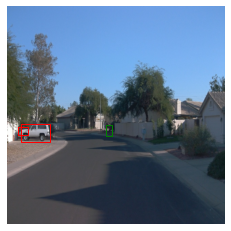

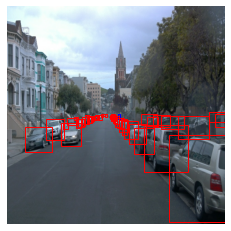

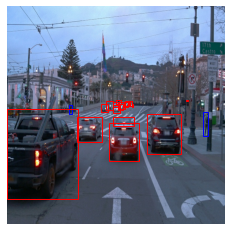

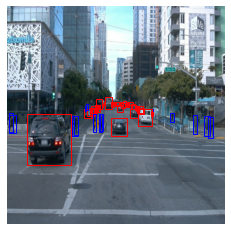

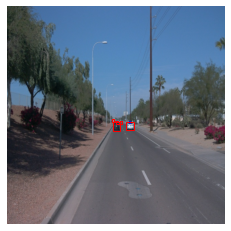

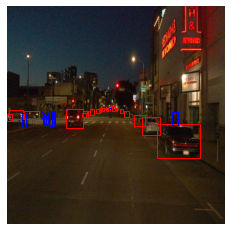

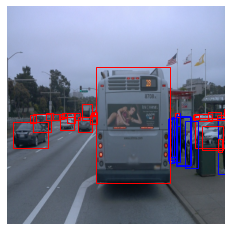

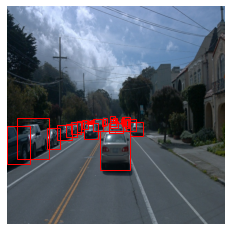

In [6]:
# Display 10 random images in dataset
plt.figure(figsize=(20, 20))
shuffle_data=dataset.shuffle(96, reshuffle_each_iteration=True).take(10)
for batch in shuffle_data:
        display_images(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [8]:
class Vehicle:
  def __init__(self):
    self.numbers = []
    self.number = 0
    self.width = 0
    self.height = 0
    self.area = 0

class Pedestrian:
  def __init__(self):
    self.numbers = []
    self.number = 0
    self.width = 0
    self.height = 0
    self.area = 0

class Cyclist:
  def __init__(self):
    self.numbers = []
    self.number = 0
    self.width = 0
    self.height = 0
    self.area = 0

    

vehicle=Vehicle()
pedestrian=Pedestrian()
cyclist=Cyclist()

classes=[vehicle, pedestrian, cyclist]
batchs=dataset.take(96)
for batch in batchs:
    img=batch["image"].numpy()
    vehicle_num=0
    pedestrian_num=0
    cyclist_num=0
    for label, bb in zip(batch["groundtruth_classes"].numpy(), batch["groundtruth_boxes"].numpy()):
        y1, x1, y2, x2 = bb
        x1,x2=x1*img.shape[0], x2*img.shape[0]
        y1,y2=y1*img.shape[1], y2*img.shape[1]
        width = x2 - x1
        height = y2 - y1
        area=width*height
        if label == 1:
                vehicle_num+=1
                vehicle.width+=width
                vehicle.height+=height
                vehicle.area+=area
        elif label == 2:
                pedestrian_num+=1
                pedestrian.width+=width
                pedestrian.height+=height
                pedestrian.area+=area
        elif label == 4:
                cyclist_num+=1
                cyclist.width+=width
                cyclist.height+=height
                cyclist.area+=area

    vehicle.numbers.append(vehicle_num)
    pedestrian.numbers.append(pedestrian_num)
    cyclist.numbers.append(cyclist_num)

vehicle.number=np.sum(vehicle.numbers)
pedestrian.number=np.sum(pedestrian.numbers)
cyclist.number=np.sum(cyclist.numbers)
        

#calculate mean of each metric
for obj in classes:
    obj.width=obj.width/obj.number
    obj.height=obj.height/obj.number
    obj.area=obj.area/obj.number
    

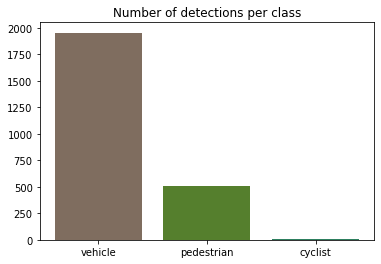

In [9]:
# Number of detections per class
height = [classes[0].number, classes[1].number, classes[2].number]
bars_name = ('vehicle', 'pedestrian', 'cyclist')
y_pos = np.arange(len(bars_name))

# Create bars
plt.bar(y_pos, height, color=['#7f6d5f', '#557f2d', '#2d7f5e'])
# Create names on the x-axis
plt.xticks(y_pos, bars_name)
# Show graphic
plt.title("Number of detections per class")
plt.show()

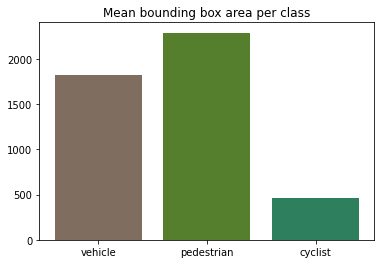

In [10]:
# Mean bounding box area per class
height = [classes[0].area, classes[1].area, classes[2].area]
bars_name = ('vehicle', 'pedestrian', 'cyclist')
y_pos = np.arange(len(bars_name))
# Create bars
plt.bar(y_pos, height, color=['#7f6d5f', '#557f2d', '#2d7f5e'])
# Create names on the x-axis
plt.xticks(y_pos, bars_name)
# Show graphic
plt.title("Mean bounding box area per class")
plt.show()

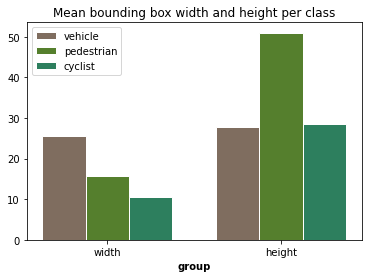

In [11]:
# Mean bounding box width and height per class
# set width of bars
barWidth = 0.25
# set heights of bars
bars1 = [classes[0].width, classes[0].height]
bars2 = [classes[1].width, classes[1].height]
bars3 = [classes[2].width, classes[2].height]
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='vehicle')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='pedestrian')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='cyclist')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['width', 'height'])
# Create legend & Show graphic
plt.title("Mean bounding box width and height per class")
plt.legend()
plt.show()

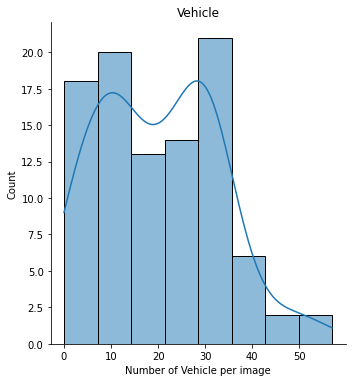

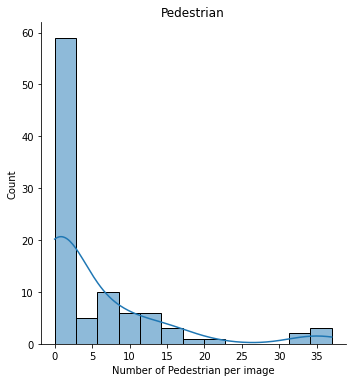

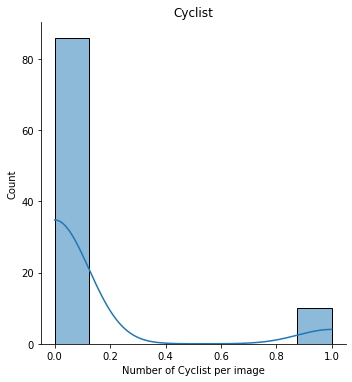

In [12]:
import seaborn as sns
for obj in classes:
    ax= sns.displot(obj.numbers, kde=True)
    ax.set(xlabel='Number of '+obj.__class__.__name__+' per image', title=obj.__class__.__name__)